## Lendo csv e separando os elementos

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
df = pd.read_csv('../dataset/plano_saude.csv')

x = df.iloc[:, 0].values
y = df.iloc[:, 1].values

## Verificar correlação

In [2]:
import numpy as np
correlacao = np.corrcoef(x,y)

## Regressão linear simples

b0: -558.9490909090912 	b1: [61.86787879]
Previsao 1: [1915.76606061] 	Previsao 2: [1915.76606061]
Score: 0.8666112727879174


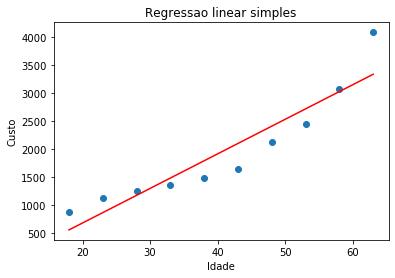

In [3]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x = x.reshape(-1,1)
regressor_linear = LinearRegression()
regressor_linear.fit(x, y)

print('b0:',regressor_linear.intercept_, '\tb1:',regressor_linear.coef_)

novo_valor = 40
previsao_1 = regressor_linear.intercept_ + regressor_linear.coef_ * novo_valor
previsao_2 = regressor_linear.predict(np.asarray(novo_valor).reshape(-1,1))
print('Previsao 1:', previsao_1, '\tPrevisao 2:', previsao_2)
print('Score:', regressor_linear.score(x,y))

plt.scatter(x, y)
plt.title('Regressao linear simples')
plt.xlabel('Idade')
plt.ylabel('Custo')
plt.plot(x, regressor_linear.predict(x), color = 'red')

## Resíduo do regressor linear

/home/lindino/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


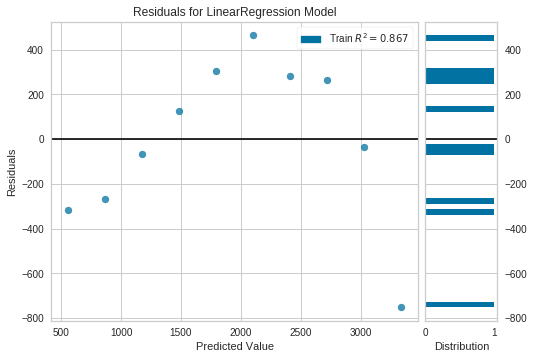

In [4]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor_linear)
visualizador.fit(x,y)
visualizador.poof()

## Regressão Linear Polinomial x Regressão Linear Simples

In [5]:
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('../dataset/plano_saude_2.csv')
x = df.iloc[:, 0:1].values
y = df.iloc[:, 1].values

In [6]:
regressor_linear = LinearRegression()
regressor_linear.fit(x, y)
linear_simples_score = regressor_linear.score(x, y)
linear_simples_error = mean_absolute_error(y, regressor_linear.predict(x))

poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x)

regressor_polinomial = LinearRegression()
regressor_polinomial.fit(x_poly, y)

linear_polinomial_score = regressor_polinomial.score(x_poly, y)
linear_polinomial_error = mean_absolute_error(y, regressor_polinomial.predict(x_poly))

## Gráficos

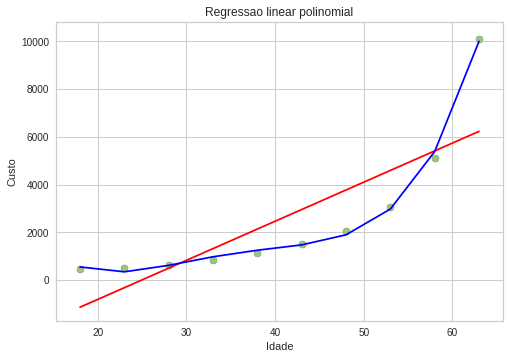

In [7]:
plt.scatter(x, y)
plt.title('Regressao linear simples')
plt.xlabel('Idade')
plt.ylabel('Custo')
plt.plot(x, regressor_linear.predict(x), color = 'red')

plt.scatter(x, y)
plt.title('Regressao linear polinomial')
plt.xlabel('Idade')
plt.ylabel('Custo')
plt.plot(x, regressor_polinomial.predict(poly.fit_transform(x)), color = 'blue')

## Árvore de Decisão

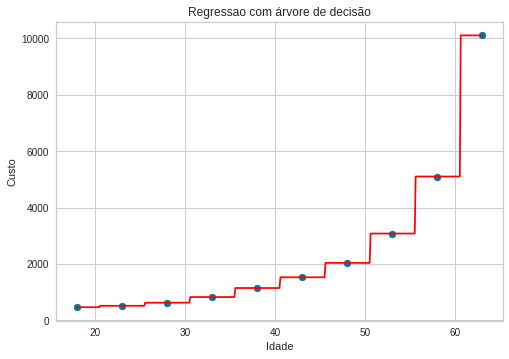

In [8]:
df = pd.read_csv('../dataset/plano_saude_2.csv')
x = df.iloc[:, 0:1].values
y = df.iloc[:, 1].values

from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x, y)

decision_tree_score = decision_tree.score(x, y)
decision_tree_error = mean_absolute_error(y, decision_tree.predict(x))

import numpy as np
x_test = np.arange(min(x), max(x), 0.1).reshape(-1,1)
plt.scatter(x, y)
plt.title('Regressao com árvore de decisão')
plt.xlabel('Idade')
plt.ylabel('Custo')
plt.plot(x_test, decision_tree.predict(x_test), color = 'red')

## Random Forest

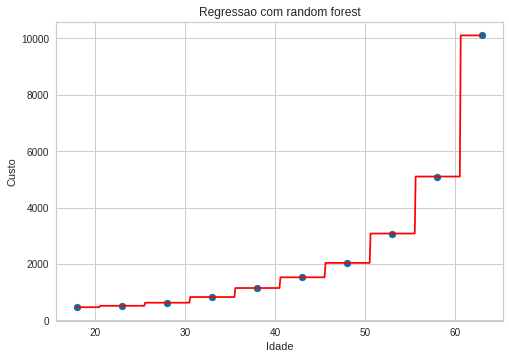

In [22]:
df = pd.read_csv('../dataset/plano_saude_2.csv')
x = df.iloc[:, 0:1].values
y = df.iloc[:, 1].values

from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 20)
random_forest.fit(x, y)

random_forest_score = random_forest.score(x, y)
random_forest_error = mean_absolute_error(y, random_forest.predict(x))

import numpy as np
x_test = np.arange(min(x), max(x), 0.1).reshape(-1,1)
plt.scatter(x, y)
plt.title('Regressao com random forest')
plt.xlabel('Idade')
plt.ylabel('Custo')
plt.plot(x_test, decision_tree.predict(x_test), color = 'red')

## SVR

/home/lindino/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


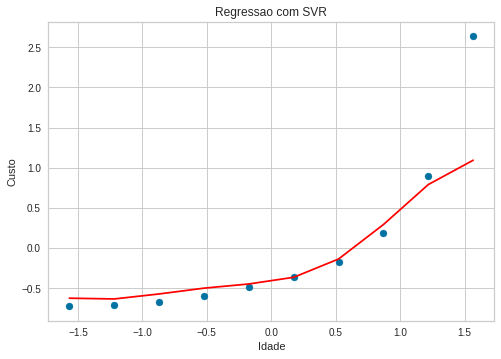

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df = pd.read_csv('../dataset/plano_saude_2.csv')
x = scaler.fit_transform(df.iloc[:, 0:1].values)
y = scaler.fit_transform(df.iloc[:, 1:2].values)

from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x,y)

plt.scatter(x,y)
plt.title('Regressao com SVR')
plt.xlabel('Idade')
plt.ylabel('Custo')
plt.plot(x, svr.predict(x), color = 'red')

svr_score = svr.score(x, y)
svr_error = mean_absolute_error(y, svr.predict(x))

## Redes Neurais

/home/lindino/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lindino/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


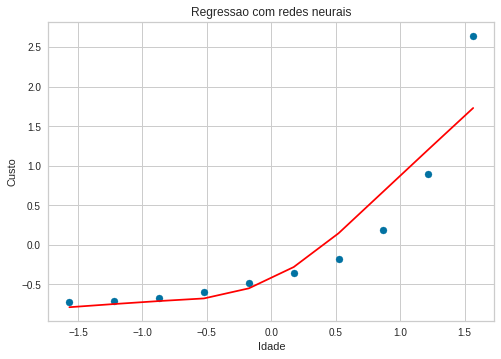

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df = pd.read_csv('../dataset/plano_saude_2.csv')
x = scaler.fit_transform(df.iloc[:, 0:1].values)
y = scaler.fit_transform(df.iloc[:, 1:2].values)

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(x,y)

rede_neural_score = mlp.score(x, y)
rede_neural_error = mean_absolute_error(y, mlp.predict(x))

plt.scatter(x,y)
plt.title('Regressao com redes neurais')
plt.xlabel('Idade')
plt.ylabel('Custo')
plt.plot(x, mlp.predict(x), color = 'red')

## Resultados

In [50]:
GREEN = "\033[1;32m" 
RESET = '\033[0;0m'
NEGRITO = '\033[1m'
scores = {'Simples': linear_simples_score, 'Polinomial': linear_polinomial_score,
          'Decision Tree': decision_tree_score, 'Random Forest': random_forest_score, 'SVR': svr_score, 
          'Rede Neural': rede_neural_score}
errors = {'Simples': linear_simples_error, 'Polinomial': linear_polinomial_error,
          'Decision Tree': decision_tree_error, 'Random Forest': random_forest_error, 'SVR': svr_error,
         'Rede Neural': rede_neural_error}

for model in scores:
    if model == 'SVR':
        print('{}{}{} \t\t-> {}\tAcurácia:{} {:.1f}%{}{} \tErro:{} {:.2f}{}'.format(NEGRITO,model,RESET,NEGRITO,GREEN,(scores[model] * 100), RESET,NEGRITO,GREEN,errors[model],RESET))
    else:
        print('{}{}{} \t-> {}\tAcurácia:{} {:.1f}%{}{} \tErro:{} {:.2f}{}'.format(NEGRITO,model,RESET,NEGRITO,GREEN,(scores[model] * 100), RESET,NEGRITO,GREEN,errors[model],RESET))

Simples 	-> 	Acurácia: 67.2% 	Erro: 1289.75
Polinomial 	-> 	Acurácia: 99.8% 	Erro: 120.74
Decision Tree 	-> 	Acurácia: 100.0% 	Erro: 0.00
Random Forest 	-> 	Acurácia: 98.1% 	Erro: 182.35
SVR 		-> 	Acurácia: 75.6% 	Erro: 0.22
Rede Neural 	-> 	Acurácia: 87.1% 	Erro: 0.24
